**AGENT-BASED ARTIFICIAL INTELLIGENCE, POLIBA, A.Y. 2023/2024**

**Constraint Satisfaction Problems**

List of Contributors:
- Tommaso Di Noia
- Alberto Carlo Maria Mancino
- Vincenzo Paparella

### Introduction to the Constrained Satisfaction Problems

So far, we have studied search algorithms (informed and uninformed strategies, and local search). Basically, these algorithms exploit a tree/graph where the nodes are states and the edges between them are actions. For each problem we need domain-specific code to describe the transitions between states. Indeed, from the point of view of the search algorithm, each state is a "black box", in the sense that it does not know the internal structure of a state.

In principle, we can see a Constraint Satisfaction Problem (CSP) as a standard search problem. However, this kind of problems have some peculiarities that we want to exploit to gather an optimal procedure to solve them. Specifically, we provide a state with a well-defined representation.

We define a state as a set of **variables**, each of which has a **value**. A problem is solved when each variable has a value that satisfies all the **constraints** on the variable. A problem described this way is called a **constraint satisfaction problem** (CSP).

Formally, a constraint satisfaction problem consists of three components, X,D, and C:
- X is a set of variables, {X1,...,Xn}.
- D is a set of domains, {D1,...,Dn}, one for each variable.
- C is a set of constraints that specify allowable combinations of values.
A domain, Di, consists of a set of allowable values, {v1,...,vk}, for variable Xi.

CSPs deal with assignments of values to variables, {Xi=vi,Xj=vj,...}. The goal of a CSP is to find an assignment in which all variables have a value (**complete assignment**) and it does not violate any constraint (**consistent assignment**).

#### Map Coloring Example

To introduce CSPs, we will use the Australia Map-Coloring problem. In this problem we have 7 regions in the Australia map. We have to color the map in such a way adjacent regiorns have different colors. The possible colors are red, green, and blue for each region.

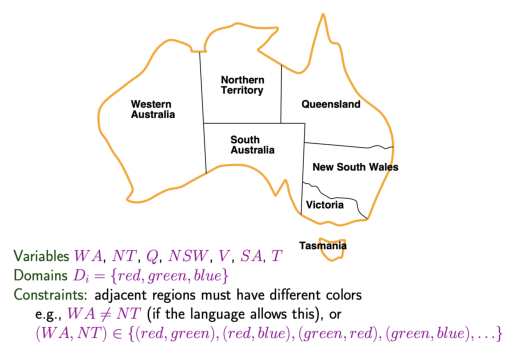

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('sample_data/Australia-region.png')
plt.imshow(img)
plt.axis('off')
plt.show()


### CSP implementation (1)

We have seen that a CSP consists of three components: variables, domains, and constraints.

Then, from an implementation point of view, we can model a CSP within a class having the variables, the domains, and the constrained as attributes.

In [1]:
class CSP:

    def __init__(self, variables, domains, constraints):
        self.variables = variables
        self.domains = domains
        self.constraints = constraints

The CSP Class implementation is not complete. Let's understand how to implement the variables, the domains, and the constraints.

### Variables, Domains and Constraints implementation

#### Variables and Domains implementation

We will insert the variables of the problem within a list.

We will model the possible values of each variable, i.e., its domain, with a dictionary in which the keys are the variables, the values are the possible values for the corresponding variable.

#### Constraints implementation

Now, let's focus on the implementation of the contraints. Remember that we desider to write a general purpose implementation. Consequently, we suppose to model a state as a dictionary in Python.

Firstly, a constraint is characterized by the variables. Indeed, we apply such constraints to the variables. Secondly, a constraint could be satisfied or violated. Then, we implement a _general_ constraint as a Class having:
- the variables as an attribute;
- the number of variables, i.e., the degree, as an attribute;
- a check function that takes in input a state. The function returns True if the constraint is satisfied in the given state, False otherwise.

For now, we implement a general constraint that is always satisfied, i.e., the check function always returns True.  

In [2]:
class Constraint:
    def __init__(self, variables):
        self.variables = variables
        self.degree = len(variables)

    def check(self, state):
        return True

##### Unary Constraints

Let's see how to implement a unary constraint. Actually, a unary constraint involves only one variable. Then, we implement it as a Class that inherit the attributes and the methods of the Constraint Class. The variables attribute of the Constraint Class is only one variable in the UnaryConstraint class.

In [3]:
class UnaryConstraint(Constraint):
    def __init__(self, variable):
        self.variable = variable
        super(UnaryConstraint, self).__init__(variables=variable) # This line calls the constructor of the superclass (Constraint),
                                                                  # passing the variable parameter to it. This initializes the variable attribute of the superclass.

    def check(self, state):
        return True

##### Value Constraints

Let's see how to implement a ValueConstraint. This kind of constraint is a unary constraints in which we can assing to a variable some accepted values only.

Therefore, this class inherits the attributes and methods of the UnaryConstraint Class. It receives in input the accepted values for the variables.

Finally, we implement the check function. In this function, if any value has been assigned to the variable (i.e., the variable is in the state), then we check if its value is among the accepted ones. We return true if so, False otherwise. In the case in which the variable is not in the state yet, conventionally we return True (otherwise our algorithm will always fail).

In [4]:
class ValueConstraint(UnaryConstraint):

    def __init__(self, variable, accepted_values):
        super(ValueConstraint, self).__init__(variables=variable)
        self.accepted_values = accepted_values

    def check(self, state):
        if self.variable in state:
            return state[self.variable] in self.accepted_values
        return True

##### That's not all!

That's not all about constraints!

Indeed, we have just seen the basic structure of a constraint. However, they should be implemented according the problem that we are solving!

### Variables, Domains and Constraints implementation in Map Color problem

We now start to model our Map Color problem as a CSP. Modeling a problem as a CSP means understanding which are the variables, the domains and implementing the constraints.

#### Variables and Domain implementation

In our problem, it is easy to understand that the variables are the regions and the domains are the possible colors to assign to each region. In this case, each region can be colored with red, green, and blue.

In [5]:
variables = ['WA', 'NT', 'Q', 'NSW', 'V', 'SA', 'T']
domains = {var: ['green', 'red', 'blue'] for var in variables}

#### Constraint implementation

In our problem, we have one constraint: adjacent regions must be colored differently. We implement a DifferentValues constraint that inherits the properties and methods of the Constraint Class.

It receives in input a list of variables.

Concerning the check function, it controls that the variables have different colors. In this case, it return True, False otherwise. To do so, we collect the values associated to the variables, i.e., the colors, in a list. Then, we compare the length of this list with the length of the set obtained from this list. If the list and the set have the same size, this means that all the values are different and the constrained is satisfied!

In [6]:
class DifferentValues(Constraint):

    def check(self, state):
        values = [state[var] for var in self.variables if var in state]
        return len(values) == len(set(values))

Let's collect the constraints of our problem within a list. Of course, we should declare which regions should have different values according to the map.

In [7]:
constraints = [DifferentValues(['WA', 'NT']),
                            DifferentValues(['NT', 'WA']),
                            DifferentValues(['WA', 'SA']),
                            DifferentValues(['SA', 'WA']),
                            DifferentValues(['SA', 'NT']),
                            DifferentValues(['NT', 'SA']),
                            DifferentValues(['SA', 'Q']),
                            DifferentValues(['Q', 'SA']),
                            DifferentValues(['SA', 'NSW']),
                            DifferentValues(['NSW', 'SA']),
                            DifferentValues(['SA', 'V']),
                            DifferentValues(['V', 'SA']),
                            DifferentValues(['Q', 'NT']),
                            DifferentValues(['NT', 'Q']),
                            DifferentValues(['NSW', 'Q']),
                            DifferentValues(['Q', 'NSW']),
                            DifferentValues(['V', 'NSW']),
                            DifferentValues(['NSW', 'V'])
                            ]

#### Test of Variables, Domains, and Constraints

Let's insert the variables, the domains, and the constraints in a MapColor Class that inherits the general CSP Class. We remember that the implementation of the CSP Class is not completed yet!

In [8]:
class MapColors(CSP):
    def __init__(self):
        self.variables = ['WA', 'NT', 'Q', 'NSW', 'V', 'SA', 'T']
        self.domains = {var: ['green', 'red', 'blue'] for var in self.variables}
        self.constraints = [DifferentValues(['WA', 'NT']),
                            DifferentValues(['NT', 'WA']),
                            DifferentValues(['WA', 'SA']),
                            DifferentValues(['SA', 'WA']),
                            DifferentValues(['SA', 'NT']),
                            DifferentValues(['NT', 'SA']),
                            DifferentValues(['SA', 'Q']),
                            DifferentValues(['Q', 'SA']),
                            DifferentValues(['SA', 'NSW']),
                            DifferentValues(['NSW', 'SA']),
                            DifferentValues(['SA', 'V']),
                            DifferentValues(['V', 'SA']),
                            DifferentValues(['Q', 'NT']),
                            DifferentValues(['NT', 'Q']),
                            DifferentValues(['NSW', 'Q']),
                            DifferentValues(['Q', 'NSW']),
                            DifferentValues(['V', 'NSW']),
                            DifferentValues(['NSW', 'V'])
                            ]

Let's test the DifferentValues constraints on different possible states! We remember that a state is a set of variables, each of which has a value and that we implement a state through a dictionary.

In [9]:
problem = MapColors()

print('Test constraint with an Empty state')
state = {}
print(all([c.check(state) for c in problem.constraints]))

# a state with only one assignment
print('Test constraint with a State with one assignment')
state = {'WA': 'red'}
print(all([c.check(state) for c in problem.constraints]))

# a state with two conflicting assignments
print('Test constraint with a State with two conflicting assignments')
state = {'WA': 'red', 'NT': 'red'}
print(all([c.check(state) for c in problem.constraints]))

# a state with two consistent assignments
print('Test constraint with a State with two consistent assignments')
state = {'WA': 'red', 'NT': 'green'}
print(all([c.check(state) for c in problem.constraints]))

Test constraint with an Empty state
True
Test constraint with a State with one assignment
True
Test constraint with a State with two conflicting assignments
False
Test constraint with a State with two consistent assignments
True


### CSP implementation (2)

We can continue the generic CSP Class implementation. We have understood that this class will be inherited by all the problem classes that we aim to solve.

We need to implement the following methods:
- a **goal test** function that tests if a state represents a solution. As seen before, CSP deals with assignments. An assignment is a solution if it is consistent and complete. Then, we will implement also two other functions:
  (1) a **consistent** function that tests if an assignment is consistent, i.e., if all the constrained are satisfied;
  (2) a **complete** function that tests if an assignment is complete, i.e., if all the variables have a value.

- an **assign** function that, given a state, a variable, and a value, assigns the value to the variable obtaining a new state;

- a **rollback** function that basically is dual to the assign function. Given a state and a variable, it removes the assignment to the state.

In addition, we implement a useful **assignable_variables** function that returns all the variables to which a value has not been assigned yet. This means that the variable is not in the state.

In [10]:
class CSP:

    def __init__(self, variables, domains, constraints):
        self.variables = variables
        self.domains = domains
        self.constraints = constraints

    def consistent(self, state):
        """
        Given a state checks if it is consistent
        @param state: a state
        @return: True or False
        """
        return all([c.check(state) for c in self.constraints])

    def complete(self, state):
        """
        Given a state checks if it is complete
        @param state: a state
        @return: True or False
        """
        return len(state) == len(self.variables)

    def goal_test(self, state):
        """
        A state is a solution if it is complete and consistent
        @param state: a state
        @return: True or False
        """
        return self.complete(state) and self.consistent(state)

    def assign(self, state, variable, value):
        """
        Given a state, a variable and a value assigns that value to that variable obtaining a new state
        @param state: a state
        @param variable: a variable of the problem
        @param value: a possible value
        @return: a new state
        """
        if variable in self.variables and value in self.domains[variable]:
            new_state = dict(state)
            new_state[variable] = value
            return new_state
        raise ValueError

    def rollback(self, state, variable):
        """
        Given a state and a variable removes the assignment to the state
        @param state: a state
        @param variable: a variable of the problem
        @return: a new state
        """
        if variable in self.variables:
            new_state = dict(state)
            del new_state[variable]
            return new_state
        raise ValueError

    def assignable_variables(self, state):
        return [variable for variable in self.variables if variable not in state]

### Backtracking

We are ready to implement the **Backtracking Search** to gather a solution for a CSP.

We implement this algorithm within a class. The algorithm has in input the problem, a strategy to select un assigned variable, and a strategy to order the values to assign.

For the moment, let's consider random strategies for selecting a variable and for ordering the values. Then, we define:

- a **random_variable** function that returns a random assignable variables. It uses the assignable_variables function implemented within the problem;

- a **random_assignment** function that returns a randomly ordered list of values.

In [11]:
import random


def random_variable(problem, state):
    """
    Given a state returns a random assignable variable
    @param problem: a CSP problem
    @param state: a state
    @return: a random assignable variable
    """
    assignable_vars = problem.assignable_variables(state)
    if assignable_vars:
        random.shuffle(assignable_vars)
        return assignable_vars.pop()
    # if there are no assignable variables
    return None


def random_assignment(problem, state, variable, domains):
    """
    Return a random value to be assigned to the variable
    @param problem: a CSP problem
    @param variable: a variable
    @return: a value for the variable
    """
    possible_values = domains[variable]
    random.shuffle(possible_values)
    return possible_values

Let's implement now the Backtracking!
Firslty, we initialize the problem, the assignign variable stategy, and the ordering values strategy within the constructor. Then, we implement a **run** function that has in input a state. The function follows these steps:

1. check if the state is the goal state;
2. choose the next variable to be assigned among the assignable variables according to the strategy;
3. order the values according to the strategy;

Then, for all the values, we aim to find the one that, once it is assigned, makes the state consistent:

4. assign the value to the selected variable obtaining a new state;
5. if the new state is consistent, then we recursively call the run function. Otherwise, we will explore another value.

During the recursion, if we find a state that is the goal state, the run function will recursively return the solution. Otherwise, when all the assignments do not produce a consistent state, the algorithm will fail and we perform the rollback.

In [12]:
class BackTracking:

    def __init__(self, problem, var_criterion=None, value_criterion=None):
        self.problem = problem
        if var_criterion is None:
            var_criterion = random_variable
        self.var_criterion = var_criterion
        if value_criterion is None:
            value_criterion = random_assignment
        self.value_criterion = value_criterion

    def __repr__(self):
        return 'Backtracking'

    def run(self, state):
        # check if the state is the goal state
        if self.problem.goal_test(state):
            return state

        # choose the next variable to be assigned
        variable = self.var_criterion(self.problem, state)
        if variable is None:
            return False

        # order the values with a desired order
        values = self.value_criterion(self.problem, state, variable, self.problem.domains)

        # for all the values
        for value in values:

            # assign the value and reach a new state
            new_state = self.problem.assign(state=state,
                                            variable=variable,
                                            value=value)
            if self.problem.consistent(new_state):
                state = dict(new_state)

                # run the search on the new state
                result = self.run(dict(state))

                # if succeeds return the solution
                if result:
                    return result
                else:
                    # if the result is a failure cancel the assignment
                    state = self.problem.rollback(state, variable)

        # if there is no possible value a failure
        return False

### First test

Ok! Let's test the Backtracking

In [13]:
class MapColors(CSP):
    def __init__(self):
        self.variables = ['WA', 'NT', 'Q', 'NSW', 'V', 'SA', 'T']
        self.domains = {var: ['green', 'red', 'blue'] for var in self.variables}
        self.constraints = [DifferentValues(['WA', 'NT']),
                            DifferentValues(['NT', 'WA']),
                            DifferentValues(['WA', 'SA']),
                            DifferentValues(['SA', 'WA']),
                            DifferentValues(['SA', 'NT']),
                            DifferentValues(['NT', 'SA']),
                            DifferentValues(['SA', 'Q']),
                            DifferentValues(['Q', 'SA']),
                            DifferentValues(['SA', 'NSW']),
                            DifferentValues(['NSW', 'SA']),
                            DifferentValues(['SA', 'V']),
                            DifferentValues(['V', 'SA']),
                            DifferentValues(['Q', 'NT']),
                            DifferentValues(['NT', 'Q']),
                            DifferentValues(['NSW', 'Q']),
                            DifferentValues(['Q', 'NSW']),
                            DifferentValues(['V', 'NSW']),
                            DifferentValues(['NSW', 'V'])
                            ]

In [14]:
problem = MapColors()
search = BackTracking(problem=problem,
                      var_criterion=random_variable,
                      value_criterion=random_assignment)
initial_state = {}
print(f'{search}')
print(search.run(initial_state))

Backtracking
{'WA': 'green', 'V': 'green', 'SA': 'blue', 'T': 'red', 'NT': 'red', 'NSW': 'red', 'Q': 'green'}


### Improving Backtracking

We have studied the Backtracking search algorithm. So far, we have adopted random strategies concerning both the strategy to select un assigned variable and the strategy to order the values to assign.

From the theory, we have some general purpose methods to improve the efficiency of the backtracking:

- **Minimum Remaining Values**: it is a strategy to select the next variable to which assign a value. It selects the variable with the fewest legal values;
- **Degree Heuristic**: it is a strategy to select the next variable to which assign a value. It chooses the variable with the most constraints on remaining variables;
- **Least Constraining Value**: it is a strategy to order the values. In the end, it selects the value that rules out the fewest values in the remaining variables (the heuristic is trying to leave the maximum flexibility for subsequent variable assignments).

For the Minimum Remaining Values strategy, _given a state, we should compute the number of values for which assigning those values to a given variable produces a consistent assignment_. To do so, we implement a **legal_moves** function in the CSP Class that returns a list of legal values given a state and a variable in input.

For the Degree Heuristic, _given a state, we should compute how many constraints a variable has with the remaining variable_. To do so, we implement a **remaining_constraints** function in the CSP Class that returns the sum of constraints between the given variable and all the other variables. This function relies on the **count_constraints** that returns the number of constraints between two variables in input.

For the Least Constraining Value, _given a state, we should compute the number of legal values that remains for the remaining variables if we assign a value to a variable_. To do so, we will use the **legal_moves** function.


#### CSP implementation (3)

The CSP Class implementation becomes the following.

In [15]:
class CSP:

    def __init__(self, variables, domains, constraints):
        self.variables = variables
        self.domains = domains
        self.constraints = constraints

    def consistent(self, state):
        """
        Given a state checks if it is consistent
        @param state: a state
        @return: True or False
        """
        return all([c.check(state) for c in self.constraints])

    def complete(self, state):
        """
        Given a state checks if it is complete
        @param state: a state
        @return: True or False
        """
        return len(state) == len(self.variables)

    def goal_test(self, state):
        """
        A state is a solution if it is complete and consistent
        @param state: a state
        @return: True or False
        """
        return self.complete(state) and self.consistent(state)

    def assign(self, state, variable, value):
        """
        Given a state, a variable and a value assigns that value to that variable obtaining a new state
        @param state: a state
        @param variable: a variable of the problem
        @param value: a possible value
        @return: a new state
        """
        if variable in self.variables and value in self.domains[variable]:
            new_state = dict(state)
            new_state[variable] = value
            return new_state
        raise ValueError

    def rollback(self, state, variable):
        """
        Given a state and a variable removes the assignment to the state
        @param state: a state
        @param variable: a variable of the problem
        @return: a new state
        """
        if variable in self.variables:
            new_state = dict(state)
            del new_state[variable]
            return new_state
        raise ValueError

    def legal_moves(self, state, variable):
        """
        Given a state and a variable returns the list of possible assignments
        @param state: a state
        @param variable: a variable of the problem
        @return: a list of the legal values
        """
        possible_values = self.domains[variable]
        return [value for value in possible_values
                if self.consistent(self.assign(state, variable, value))]

    def count_constraints(self, first_variable, second_variable):
        """
        Given two variables return the number of constraints between the two variables
        @param first_variable: a variable of the problem
        @param second_variable: a different variable of the problem
        @return: the number of constraints
        """
        return sum([1 for c in self.constraints
                    if first_variable in c.variables
                    and second_variable in c.variables])

    def remaining_constraints(self, state, variable):
        """
        Given a state and a variable returns the sum of constraints between the variable and all the other variables
        @param state: a state
        @param variable: a variable
        @return: a number of constraints
        """
        remaining_variables = [var for var in self.variables if var not in state and var != variable]
        if remaining_variables:
            return sum([self.count_constraints(variable, rem_var) for rem_var in remaining_variables])
        else:
            return 0

    def assignable_variables(self, state):
        return [variable for variable in self.variables if variable not in state]

#### Minimum Remaining Values

The implementation of the minimum remaining values strategy is the following. Computed the list of assignable variables given a state in input, we choose the variable that has the minimum number of legal values.

In [16]:
def minimum_remaining_values(problem, state):
    """
    Choose the variable with the fewest legal values
    @param problem: a CSP problem
    @param state: a state
    @return: a variable
    """
    return min(problem.assignable_variables(state), key=lambda v: len(problem.legal_moves(state, v)))

#### Degree Heuristic

The implementation of the degree heuristic strategy is the following. Computed the list of assignable variables given a state in input, we choose the variable that has the maximum number of remaining constraints.

In [17]:
def degree_heuristic(problem, state):
    """
    Choose the variable with the most constraints on remaining variables
    @param problem: a CSP problem
    @param state: a state
    @return: a variable
    """
    return max(problem.assignable_variables(state), key=lambda v: problem.remaining_constraints(state, v))

#### Least Constraining Value

The implementation of the list constraining values strategy is the following. Firstly, we retrieve the possible values for the variable in input. Given a possible values, we compute the new state obtained by assigning the value to the variable. Then, we obtain the assignable variables given this new state. For each assignable variables, we compute the legal values for them. We count them. We sum them. We repeat this procedure for each possible value. Finally, we sort the assignable values according to the computed sum in a descending way.

In [18]:
def least_constraining_value(problem, state, variable, domains):
    """
    Given a variable, choose the least constraining value
    @param problem: a CSP problem
    @param state: a state
    @param variable: an assignable variable
    @return: a list of assignable values
    """
    assignable_values = domains[variable]
    return sorted(assignable_values,
                  key=lambda v: -sum([len(problem.legal_moves(problem.assign(state, variable, v), var))
                                      for var in problem.assignable_variables(problem.assign(state, variable, v))]))

#### Test

Let's test the strategies!

In [19]:
class MapColors(CSP):
    def __init__(self):
        self.variables = ['WA', 'NT', 'Q', 'NSW', 'V', 'SA', 'T']
        self.domains = {var: ['green', 'red', 'blue'] for var in self.variables}
        self.constraints = [DifferentValues(['WA', 'NT']),
                            DifferentValues(['NT', 'WA']),
                            DifferentValues(['WA', 'SA']),
                            DifferentValues(['SA', 'WA']),
                            DifferentValues(['SA', 'NT']),
                            DifferentValues(['NT', 'SA']),
                            DifferentValues(['SA', 'Q']),
                            DifferentValues(['Q', 'SA']),
                            DifferentValues(['SA', 'NSW']),
                            DifferentValues(['NSW', 'SA']),
                            DifferentValues(['SA', 'V']),
                            DifferentValues(['V', 'SA']),
                            DifferentValues(['Q', 'NT']),
                            DifferentValues(['NT', 'Q']),
                            DifferentValues(['NSW', 'Q']),
                            DifferentValues(['Q', 'NSW']),
                            DifferentValues(['V', 'NSW']),
                            DifferentValues(['NSW', 'V'])
                            ]

In [20]:
problem = MapColors()
initial_state = {}

search = BackTracking(problem=problem,
                      var_criterion=random_variable,
                      value_criterion=random_assignment)

print(f'{search}, Random strategies')
print(search.run(initial_state))

search = BackTracking(problem=problem,
                      var_criterion=minimum_remaining_values,
                      value_criterion=least_constraining_value)

print(f'{search}, Minimum Remaining Values, Least Constraining Value')
print(search.run(initial_state))

search = BackTracking(problem=problem,
                      var_criterion=degree_heuristic,
                      value_criterion=least_constraining_value)

print(f'{search},Degree Heuristic, Least Constraining Value')
print(search.run(initial_state))

Backtracking, Random strategies
{'SA': 'blue', 'T': 'red', 'Q': 'red', 'V': 'red', 'NT': 'green', 'NSW': 'green', 'WA': 'red'}
Backtracking, Minimum Remaining Values, Least Constraining Value
{'WA': 'blue', 'NT': 'green', 'SA': 'red', 'Q': 'blue', 'NSW': 'green', 'V': 'blue', 'T': 'red'}
Backtracking,Degree Heuristic, Least Constraining Value
{'SA': 'blue', 'NT': 'green', 'NSW': 'green', 'WA': 'red', 'Q': 'red', 'V': 'red', 'T': 'red'}


### Backtracking with Forward Checking

Another way to improve the efficiency of Backtracking Search is the Forward Checking technique. The idea of Forward Checking is to keep track of remaining legal values for unassigned variables. Whenever a variable X is assigned, the forward-checking process checks for each unassigned variable Y that is connected to X by a constraint. It deletes from Y's domain any value that is inconsistent with the value chosen for X. The search is terminated when any variable has no legal values.

To implement the Forward Checking technique, we will implement a new run-like function in the Backtracking Class, named **run_with_forward_checking**. Contrarly to the run function, this function keeps track of the domains of each variable. Specifically, within the domains of each variable, we retain the legal values solely each time we perform an assignment obtaining a new state. We perform this operation with a **forward_checking** function that leverages on the **legal_moves** function implemented before. Once we have updated the domains, in the **run_with_forward_checking** search we check if any variable does not have any legal values, i.e., its domain is empty. In this case, we return a Failure performing the rollback.

The new implementation of the Backtracking Class is below.


In [23]:
class BackTracking:

    def __init__(self, problem, var_criterion=None, value_criterion=None):
        self.problem = problem
        if var_criterion is None:
            var_criterion = random_variable
        self.var_criterion = var_criterion
        if value_criterion is None:
            value_criterion = random_assignment
        self.value_criterion = value_criterion

    def __repr__(self):
        return 'Backtracking'

    def run(self, state):
        # check if the state is the goal state
        if self.problem.goal_test(state):
            return state

        # choose the next variable to be assigned
        variable = self.var_criterion(self.problem, state)
        if variable is None:
            return False

        # order the values with a desired order
        values = self.value_criterion(self.problem, state, variable, self.problem.domains)

        # for all the values
        for value in values:

            # assign the value and reach a new state
            new_state = self.problem.assign(state=state,
                                            variable=variable,
                                            value=value)
            if self.problem.consistent(new_state):
                state = dict(new_state)

                # run the search on the new state
                result = self.run(dict(state))

                # if succeeds return the solution
                if result:
                    return result
                else:
                    # if the result is a failure cancel the assignment
                    state = self.problem.rollback(state, variable)

        # if there is no possible value a failure
        return False

    def forward_checking(self, state, domains):
        new_domains = dict(domains)
        for var in self.problem.variables:
            new_domains[var] = self.problem.legal_moves(state, var)
        return new_domains

    def run_with_forward_checking(self, state, domains):
        # check if the state is the goal state
        if self.problem.goal_test(state):
            return state

        # check for domain failure with forward checking
        if [] in domains.values():
            return False

        # choose the next variable to be assigned
        variable = self.var_criterion(self.problem, state)
        if variable is None:
            return False

        # order the values with a desired order
        values = self.value_criterion(self.problem, state, variable, domains)

        # for all the values
        for value in values:

            # assign the value and reach a new state
            new_state = self.problem.assign(state=state,
                                            variable=variable,
                                            value=value)

            if self.problem.consistent(new_state):
                state = dict(new_state)

                # apply forward checking
                new_domains = self.forward_checking(state, domains)
                del(new_domains[variable])  # we delete the entry of the dictionary having the variable to which a value has been already assigned as key

                # run the search on the new state
                result = self.run_with_forward_checking(dict(state), new_domains)

                # if succeeds return the solution
                if result:
                    return result
                else:
                    # if the result is a failure cancel the assignment
                    state = self.problem.rollback(state, variable)

        # if there is no possible value a failure
        return False

#### Test

Let's test the Forward Checking.

In [24]:
problem = MapColors()
initial_state = {}

search = BackTracking(problem=problem,
                      var_criterion=random_variable,
                      value_criterion=random_assignment)

print(f'{search}, Random strategies')
print(search.run(initial_state))

search = BackTracking(problem=problem,
                      var_criterion=minimum_remaining_values,
                      value_criterion=least_constraining_value)

print(f'{search}, Minimum Remaining Values, Least Constraining Value')
print(search.run(initial_state))

search = BackTracking(problem=problem,
                      var_criterion=degree_heuristic,
                      value_criterion=least_constraining_value)

print(f'{search},Degree Heuristic, Least Constraining Value')
print(search.run(initial_state))

print(f'{search},Forward Checking, Degree Heuristic, Least Constraining Value')
print(search.run_with_forward_checking(initial_state, problem.domains))

Backtracking, Random strategies
{'SA': 'green', 'NT': 'blue', 'T': 'red', 'WA': 'red', 'Q': 'red', 'V': 'red', 'NSW': 'blue'}
Backtracking, Minimum Remaining Values, Least Constraining Value
{'WA': 'red', 'NT': 'blue', 'SA': 'green', 'Q': 'red', 'NSW': 'blue', 'V': 'red', 'T': 'red'}
Backtracking,Degree Heuristic, Least Constraining Value
{'SA': 'green', 'NT': 'blue', 'NSW': 'blue', 'WA': 'red', 'Q': 'red', 'V': 'red', 'T': 'red'}
Backtracking,Forward Checking, Degree Heuristic, Least Constraining Value
{'SA': 'green', 'NT': 'blue', 'NSW': 'blue', 'WA': 'red', 'Q': 'red', 'V': 'red', 'T': 'red'}


### AC-3 Algorithm

The AC-3 algorithm is the most popular algorithm for enforcing arc consistency. A variable in a CSP is arc-consistent if every value in its domain satisfies the variable's binary constraints. More formally, Xi is arc-consistent with respect to another variable Xj if for every value in the current domain Di there is some value in the domain Dj that satisfies the binary constraint on the arc (Xi,Xj). A graph is arc-consistent if every variable is arc-consistent with every other variable.

To make every variable arc-consistent, the AC-3 algorithm maintains a queue of arcs to consider.

1. Initially, the queue contains all the arcs in the CSP (each binary constraint becomes two arcs, one in each direction). These arcs are retrieved with the **all_arcs** function.

2. AC-3 then pops off an arbitrary arc (Xi,Xj) from the queue and makes Xi arc-consistent with respect to Xj. We do this with the **remove_inconsistent_values** that we implement in the CSP class. If this function leaves Di unchanged, the algorithm just moves on to the next arc. But if this functions revises Di (makes the domain smaller), then we add to the queue all arcs (Xk,Xi), where Xk is a neighbor of Xi, with the function **add_neighbors**.

#### Remove Inconsistent Values

We implement the remove_inconsistent_values function in the CSP Class. Given an arc constraint over the variables x_i, x_j, the function checks that the values of x_i makes to have at least one value in x_j that satisfies the constraint, otherwise remove that value of x_i from its domain. The function returns True if it has performed any removing action, False otherwise.

In [25]:
class CSP:

    def __init__(self, variables, domains, constraints):
        self.variables = variables
        self.domains = domains
        self.constraints = constraints
        self.initial_state = dict()

    def consistent(self, state):
        """
        Given a state checks if it is consistent
        @param state: a state
        @return: True or False
        """
        return all([c.check(state) for c in self.constraints])

    def complete(self, state):
        """
        Given a state checks if it is complete
        @param state: a state
        @return: True or False
        """
        return len(state) == len(self.variables)

    def goal_test(self, state):
        """
        A state is a solution if it is complete and consistent
        @param state: a state
        @return: True or False
        """
        return self.complete(state) and self.consistent(state)

    def assign(self, state, variable, value):
        """
        Given a state, a variable and a value assigns that value to that variable obtaining a new state
        @param state: a state
        @param variable: a variable of the problem
        @param value: a possible value
        @return: a new state
        """
        if variable in self.variables and value in self.domains[variable]:
            new_state = dict(state)
            new_state[variable] = value
            return new_state
        raise ValueError

    def rollback(self, state, variable):
        """
        Given a state and a variable removes the assignment to the state
        @param state: a state
        @param variable: a variable of the problem
        @return: a new state
        """
        if variable in self.variables:
            new_state = dict(state)
            del new_state[variable]
            return new_state
        raise ValueError

    def legal_moves(self, state, variable):
        """
        Given a state and a variable returns the list of possible assignments
        @param state: a state
        @param variable: a variable of the problem
        @return: a list of the legal values
        """
        possible_values = self.domains[variable]
        return [value for value in possible_values
                if self.consistent(self.assign(state, variable, value))]

    def count_constraints(self, first_variable, second_variable):
        """
        Given two variables return the number of constraints between the two variables
        @param first_variable: a variable of the problem
        @param second_variable: a different variable of the problem
        @return: the number of constraints
        """
        return sum([1 for c in self.constraints
                    if first_variable in c.variables
                    and second_variable in c.variables])

    def remaining_constraints(self, state, variable):
        """
        Given a state and a variable returns the sum of constraints between the variable and all the other variables
        @param state: a state
        @param variable: a variable
        @return: a number of constraints
        """
        remaining_variables = [var for var in self.variables if var not in state and var != variable]
        if remaining_variables:
            return sum([self.count_constraints(variable, rem_var) for rem_var in remaining_variables])
        else:
            return 0

    def assignable_variables(self, state):
        return [variable for variable in self.variables if variable not in state]

    def remove_inconsistent_values(self, arc, actual_state):
        """
        Given an arc constraint over the variables x_i, x_j check that the values of x_i have at least one value
        in x_j that satisfies the constraint, otherwise remove that value of x_i from its domain
        @param arc: an arc constraint
        @param actual_state: the problem state
        @return: True if some value of x_i has been removed, False otherwise
        """
        # variable of the arc x_i => x_j
        x_i, x_j = arc.variables

        # variable that checks if some value has been removed
        removed = False
        # iterate for all the possible assignments of x_i
        for value_i in self.domains[x_i]:
            # assign the value to x_i
            state = self.assign(state=actual_state,
                                variable=x_i,
                                value=value_i)
            # check the constraint validity for all the possible values of x_j
            assignments = [arc.check(self.assign(state=state,
                                                 variable=x_j,
                                                 value=value_j)) for value_j in self.domains[x_j]]
            # if there are no possible assignments
            if not any(assignments):
                # remove the value from the domain of x_i
                self.domains[x_i].remove(value_i)
                print(f'removing {value_i} from {x_i}')
                removed = True
        return removed

#### AC-3 implementation

The implementation of AC-3 algorithm is below. In the **run** function we implement the steps described above.

In [26]:
class AC3:
    def __init__(self, csp):
        self.csp = csp

    def all_arcs(self):
        queue = []
        for cons in self.csp.constraints:
            if cons.degree == 2:
                queue.append(cons)
        return queue

    def add_neighbours(self, queue, arc):
        var, _ = arc.variables
        neighbours = [arc for arc in self.all_arcs() if arc.variables[1] == var]
        queue.extend(neighbours)

    def run(self, state):
        # initial queue with all the arcs in the problem
        queue = self.all_arcs()

        # while the queue is not empty
        while queue:
            # select an arc from the queue
            arc = queue.pop()
            if 0 in [len(v) for k, v in self.csp.domains.items()]:
                return False
            if self.csp.remove_inconsistent_values(arc=arc, actual_state=state):
                self.add_neighbours(queue, arc)
        return True


Let's test it!

In [28]:
problem = MapColors()
initial_state = {}
# Example 1
print('Example 1')
problem = CSP(variables=problem.variables,
              domains=problem.domains,
              constraints=problem.constraints)
state = problem.initial_state
optimizer = AC3(csp=problem)
optimizer.run(state)
print(problem.domains)

# Example 2
print('Example 2')
problem = CSP(variables=problem.variables,
              domains=problem.domains,
              constraints=problem.constraints)

problem.domains['WA'] = ['red']
problem.domains['Q'] = ['green']
optimizer = AC3(csp=problem)
optimizer.run(state)
print(problem.domains)

Example 1
{'WA': ['green', 'red', 'blue'], 'NT': ['green', 'red', 'blue'], 'Q': ['green', 'red', 'blue'], 'NSW': ['green', 'red', 'blue'], 'V': ['green', 'red', 'blue'], 'SA': ['green', 'red', 'blue'], 'T': ['green', 'red', 'blue']}
Example 2
removing green from NSW
removing green from NT
removing green from SA
removing red from SA
removing blue from V
removing blue from NSW
removing red from V
removing blue from NT
removing red from WA
{'WA': [], 'NT': ['red'], 'Q': ['green'], 'NSW': ['red'], 'V': ['green'], 'SA': ['blue'], 'T': ['green', 'red', 'blue']}
